# Catmull-Rom Splines

## Inspriation
This is the algorithm used by [p5.js](https://p5js.org)'s [curveVertex()](https://p5js.org/reference/#/p5/curveVertex) function as indicated in the [source code](https://github.com/processing/p5.js/blob/main/src/core/shape/curves.js).

## Implementation

This code is based on the [Code Example](https://en.wikipedia.org/wiki/Centripetal_Catmull–Rom_spline#Code_example_in_Python) from the [Centripetal Catmull–Rom spline Wikipedia Page](https://en.wikipedia.org/wiki/Centripetal_Catmull–Rom_spline)


In [1]:
import numpy
import matplotlib.pyplot as plt


QUADRUPLE_SIZE: int = 4


def num_segments(points: tuple) -> int:
    return len(points) - (QUADRUPLE_SIZE - 1)


def catmull_rom_spline(
    P0: tuple,
    P1: tuple,
    P2: tuple,
    P3: tuple,
    num_points: int,
    alpha: float = 0.5,
):
    """
    Compute the points in the spline segment
    :param P0, P1, P2, and P3: The (x,y) point pairs that define the Catmull-Rom spline
    :param num_points: The number of points to include in the resulting curve segment
    :param alpha: 0.5 for the centripetal spline, 0.0 for the uniform spline, 1.0 for the chordal spline.
    :return: The points
    """

    # Calculate t0 to t4. Then only calculate points between P1 and P2.
    # Reshape linspace so that we can multiply by the points P0 to P3
    # and get a point for each value of t.
    def tj(ti: float, pi: tuple, pj: tuple) -> float:
        xi, yi = pi
        xj, yj = pj
        dx, dy = xj - xi, yj - yi
        l = (dx ** 2 + dy ** 2) ** 0.5
        return ti + l ** alpha

    t0: float = 0.0
    t1: float = tj(t0, P0, P1)
    t2: float = tj(t1, P1, P2)
    t3: float = tj(t2, P2, P3)
    t = numpy.linspace(t1, t2, num_points).reshape(num_points, 1)

    A1 = (t1 - t) / (t1 - t0) * P0 + (t - t0) / (t1 - t0) * P1
    A2 = (t2 - t) / (t2 - t1) * P1 + (t - t1) / (t2 - t1) * P2
    A3 = (t3 - t) / (t3 - t2) * P2 + (t - t2) / (t3 - t2) * P3
    B1 = (t2 - t) / (t2 - t0) * A1 + (t - t0) / (t2 - t0) * A2
    B2 = (t3 - t) / (t3 - t1) * A2 + (t - t1) / (t3 - t1) * A3
    points = (t2 - t) / (t2 - t1) * B1 + (t - t1) / (t2 - t1) * B2
    return points


def catmull_rom_chain(points: tuple, num_points: int) -> list:
    """
    Calculate Catmull-Rom for a sequence of initial points and return the combined curve.
    :param points: Base points from which the quadruples for the algorithm are taken
    :param num_points: The number of points to include in each curve segment
    :return: The chain of all points (points of all segments)
    """
    point_qudruples = (
        (points[idx_segment_start + d] for d in range(QUADRUPLE_SIZE))
        for idx_segment_start in range(num_segments(points))
    )
    all_splines = (catmull_rom_spline(*q, num_points) for q in point_qudruples)

    chain = [chain_point for spline in all_splines for chain_point in spline]  # flatten
    return chain




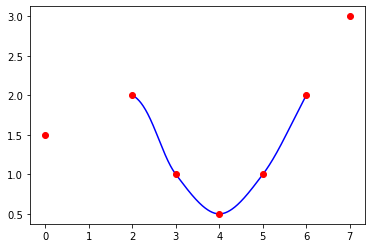

In [2]:
POINTS: tuple = ((0, 1.5), (2, 2), (3, 1), (4, 0.5), (5, 1), (6, 2), (7, 3))
NUM_POINTS: int = 100  # Density of chain points

chain_points: list = catmull_rom_chain(POINTS, NUM_POINTS)
assert len(chain_points) == num_segments(POINTS) * NUM_POINTS  # 400 blue points for this example


plt.plot(*zip(*chain_points), c="blue")
plt.plot(*zip(*POINTS), c="red", linestyle="none", marker="o")

plt.savefig("spline.svg", format="svg")
